In [1]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense, Flatten, MaxPooling2D, UpSampling2D, Conv2D
from keras.preprocessing import image
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import keras.backend as K
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


(420, 540, 3)
(258, 540, 3)


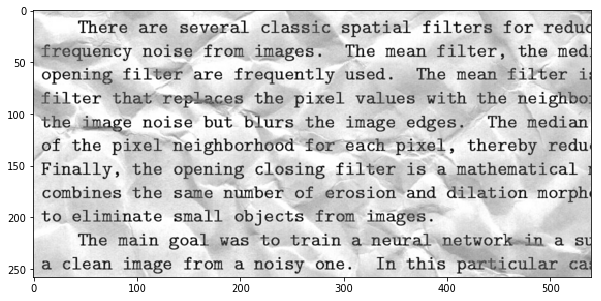

In [2]:
plt.figure(figsize=(10,10))
img= cv2.imread('train/74.png')
plt.imshow(img, cmap='gray')
print(img.shape)

img= cv2.imread('train/72.png')
plt.imshow(img, cmap='gray')
print(img.shape)

In [3]:
train_images = glob.glob('C:/Users/soumyama/Documents/Python Scripts/Kaggle/Denoise_Dirty_Docs/train/*png')
train_images_cleaned= glob.glob('C:/Users/soumyama/Documents/Python Scripts/Kaggle/Denoise_Dirty_Docs/train_cleaned/*png')
test_images= glob.glob('C:/Users/soumyama/Documents/Python Scripts/Kaggle/Denoise_Dirty_Docs/test/*png')

In [4]:
def load_image(path):
    image_lst= np.zeros((len(path), 258, 540, 1))
    for i, fig in enumerate(path):
        img= image.load_img(fig, color_mode='grayscale', target_size=(258, 540))
        x= image.img_to_array(img).astype('float32')
        x= x/255.
        image_lst[i]= x
        
    return image_lst

In [5]:
#create data

x_train = load_image(train_images)
y_train= load_image(train_images_cleaned)
x_test= load_image(test_images)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(144, 258, 540, 1)
(144, 258, 540, 1)
(72, 258, 540, 1)


In [7]:
height= x_train.shape[1]
width= x_train.shape[2]

In [8]:
#network parameters

input_shape= (height, width, 1)
batch_size=16
kernel_size=3
filters=64
latent_dim=32

In [9]:
#encoder

inputs= Input(shape= input_shape, name='encoder_input')
x= inputs
x= Conv2D(filters=filters, kernel_size=kernel_size,
          padding='same', activation='relu')(x)
x= MaxPooling2D((2,2), padding='same')(x)

#decoder
x= Conv2D(filters=filters, kernel_size=kernel_size, 
          padding='same', activation='relu')(x) 
x= UpSampling2D((2,2))(x)
output= Conv2D(filters=1, kernel_size=kernel_size,
          padding='same', activation='sigmoid')(x)

In [10]:
#instantiate encoder

autoencoder= Model(inputs, output, name='autoencoder')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 258, 540, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 258, 540, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 129, 270, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 129, 270, 64)      36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 258, 540, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 258, 540, 1)       577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Instantiate autoencoder

autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')

In [12]:

#reduce learning rate by sqrt(0.1) if loss does not imporve in 5 epochs

lr_reducer= ReduceLROnPlateau(factor= np.sqrt(0.1),
                             cooldown=0,
                             patience=5,
                             verbose=1,
                             min_lr=0.5e-6)

early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=10,
                                       verbose=1, 
                                       mode='auto')
#called every epoch

callbacks=[lr_reducer]#, early_stopping]

In [13]:
#train network

history= autoencoder.fit(x_train, y_train, epochs=200, batch_size=batch_size, callbacks=callbacks)

Epoch 1/200
144/144 [==============================] - 14s 94ms/step - loss: 0.1346
Epoch 2/200


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


144/144 [==============================] - 3s 18ms/step - loss: 0.0732
Epoch 3/200
144/144 [==============================] - 3s 18ms/step - loss: 0.0743
Epoch 4/200
144/144 [==============================] - 2s 17ms/step - loss: 0.0633
Epoch 5/200
144/144 [==============================] - 3s 18ms/step - loss: 0.0544
Epoch 6/200
144/144 [==============================] - 3s 18ms/step - loss: 0.0423
Epoch 7/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0327
Epoch 8/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0279
Epoch 9/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0254
Epoch 10/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0235
Epoch 11/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0215
Epoch 12/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0198
Epoch 13/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0183
Epoch 14/200

144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 100/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 101/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0029
Epoch 102/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 103/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 104/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0030
Epoch 105/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0030
Epoch 106/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 107/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0029
Epoch 108/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0028
Epoch 109/200
144/144 [==============================] - 3s 19ms/step - loss: 0.0028
Epoch 110/200
144/144 [==============================] - 3s 20ms/step - loss: 0

144/144 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 196/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 197/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 198/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 199/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 200/200
144/144 [==============================] - 3s 20ms/step - loss: 0.0020


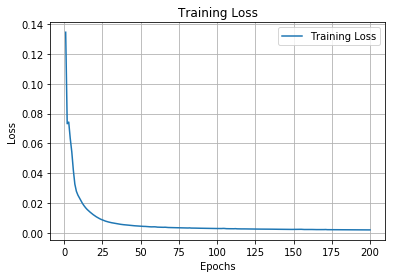

In [15]:
loss= history.history['loss']
#val_loss= history.history['val_loss']

epochs= range(1,len(loss)+1)

plt.plot(epochs, loss, label= 'Training Loss')
#plt.plot(epochs, val_loss, label= 'validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


In [16]:
preds= autoencoder.predict(x_test)

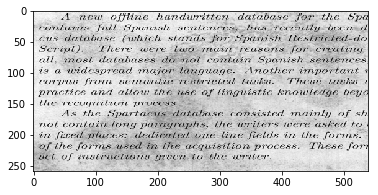

In [40]:
x_test_0 = x_test[20] * 255.0
x_test_0 = x_test_0.reshape(258, 540)
plt.imshow(x_test_0, cmap='gray')
plt.savefig('noisy_test_images3.png')

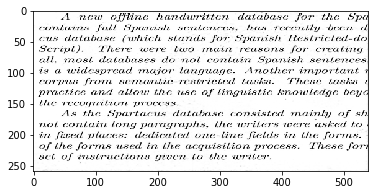

In [41]:
preds_0 = preds[20] * 255.0
preds_0 = preds_0.reshape(258, 540)
plt.imshow(preds_0, cmap='gray')
plt.savefig('clean_test_images3.png')

In [32]:
preds = preds.reshape(-1, 258, 540)

In [42]:
plot_model(autoencoder, to_file='autoencoder_denoise.png', show_shapes=True)

### Autoencoder
![autoencoder_denoise](https://user-images.githubusercontent.com/13174586/52558306-05a06000-2e18-11e9-9726-9c97575ba52c.png)

### Sample Test Data and Denoised Output
![noisy_test_images](https://user-images.githubusercontent.com/13174586/52558349-24065b80-2e18-11e9-8d3a-89d52d558c17.png)

![clean_test_images](https://user-images.githubusercontent.com/13174586/52558344-21a40180-2e18-11e9-9296-7646f61b5db1.png)


![noisy_test_images2](https://user-images.githubusercontent.com/13174586/52558377-35e7fe80-2e18-11e9-8015-e347cb44eacc.png)

![clean_test_images2](https://user-images.githubusercontent.com/13174586/52558392-41d3c080-2e18-11e9-9445-44b7f00f042a.png)


![noisy_test_images3](https://user-images.githubusercontent.com/13174586/52558408-4b5d2880-2e18-11e9-92b0-d31a0d8dcb15.png)
![clean_test_images3](https://user-images.githubusercontent.com/13174586/52558419-5617bd80-2e18-11e9-8bf2-a7b1ea6db5b9.png)